<center><img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="180"></center>

# ML on Google Playstore Data

<center><img src="https://github.com/Shailee06/Images/blob/main/Playstore-Title.jpg?raw=true" width="2000" height="1800" align='left'><br/></center>


# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
4. [Data Preprocessing](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [How many categories are there in total and what is the counts of apps in each?](#section501)<br>
  - 5.2 [What is the count of unique genres under each category?](#section502)<br>
  - 5.3 [Standardizing values of Content Rating](#section503)<br>
  - 5.4 [What are the top 10 categories by count of apps?](#section504)<br>
  - 5.5 [What is the Rating distribution?](#section505)<br>
  - 5.6 [Correlation of attributes based on categories](#section506)<br>
  - 5.7 [Observations](#section507)<br>
6. [Classification](#section6)<br>
  - 6.1 [Data Preparation for ML](#section601)<br>
  - 6.2 [Model 1: Decision Tree Classifier](#section602)<br>
  - 6.3 [Model 2: Random Forest Classifier](#section603)<br>
  - 6.4 [Model 3: Grid Search CV_DT](#section604)<br>
  - 6.5 [Model 4: Grid Search CV_RF](#section605)<br>
  - 6.6 [Model 5: Logistic Regression](#section606)<br>
  - 6.7 [Model 6: Grid Search CV_LogR](#section607)<br>
  - 6.8 [Model Evaluation](#section608)<br>
  - 6.9 [Summary](#section609)<br>
7. [Regression](#section7)<br>
  - 7.1 [Data Preparation for ML](#section701)<br>
  - 7.2 [Model 1: Decision Tree Regressor](#section702)<br>
  - 7.3 [Model 2: Grid Search CV_DT](#section703)<br>
  - 7.4 [Model 3: Random Forest Regressor](#section704)<br>
  - 7.5 [Model 4: Grid Search CV_RF1](#section705)<br>
  - 7.6 [Model 5: Grid Search CV_RF2](#section706)<br>
  - 7.7 [Model 6: Linear Regression](#section707)<br>
  - 7.8 [Model Evaluation](#section708)<br>
  - 7.9 [Summary](#section709)<br>
8. [Conclusion](#section8)

# <a id=section1></a>
## 1. Problem Statement

For an Android App development company, first we identified which **type of Apps** should they target to get **maximum user participation** using EDA. As a next step, the objective is to build models to predict whether: <br> 
> -> An app should be a **Free** or **Paid** App?<br>
> -> If Paid, what should be the **approximate price point** for the app?
<br> 
<center><img src = 'https://github.com/Shailee06/Images/blob/main/Playstore-Main.jpg?raw=true'></center>

# <a id=section2></a>
## 2. Importing Packages

In [1]:
import sys                                                                      # Import packages
 
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline  
from pylab import *

import warnings
warnings.filterwarnings('ignore') 

import seaborn as sns
sns.set(style='white',font_scale=1.3,color_codes=True)
from datetime import datetime, timedelta


<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using a single dataset about **Google Playstore**. 
<br>
<center><img src="https://github.com/Shailee06/Images/blob/main/Playstore-3.jpg?raw=true" width=400 height=300><br/></center>

- This dataset contains information about the **installations**, **price**, **ratings** and **review** information for different types incl. **Category**, **Genres**, **Size**, etc. of Android apps available on Google Playstore.

### Importing the Dataset

In [2]:
playstore_df = pd.read_excel('https://github.com/Shailee06/Datasets/blob/main/googleplaystore.xlsx?raw=true')

<a id=section4></a>
### 4 Data Preprocessing

Now we have the dataset loaded and ready to use. We will now start with Data preprocessing and Exploratory data analysis whereby we explore all the columns and also their relationship with other columns

Checking the overview of the data through .head () and .info() and check for missing variables, type of cell etc.

In [3]:
playstore_df.sort_values(by = 'Last Updated', inplace = True)
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209k,"100,000+",Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up
7430,CJ Poker Odds Calculator,GAME,4.1,207,116k,"50,000+",Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,981,73k,"100,000+",Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,"5,000,000+",Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
8084,Freecell CY,GAME,4.0,387,1.1M,"50,000+",Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up


In [4]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 7479 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          9367 non-null   float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  object        
 5   Installs        10841 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10841 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.2+ MB


Observations from .info() are as under;

1.There are missing values in the dataset <br>
2.We have 12 columns and 10841 rows of data.<br>
3.Out of the 12 columns, 9 columns have objects and balance 8 columns are numerical<br>

Checking the flow of the 8 numerical columns using .describe() function as under;


In [5]:
playstore_df.describe()

,Rating,Reviews,Price
count,9367.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,1.027273
std,0.515735,2.927629e+06,15.948971
min,1.000000,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,0.000000
50%,4.300000,2.094000e+03,0.000000
75%,4.500000,5.476800e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [6]:
#Finding duplicate rows based on App Name
duplicate = playstore_df[playstore_df.duplicated('App')]
duplicate

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2186,Bita and the Animals - Pelos Ares,FAMILY,4.4,1160,37M,"100,000+",Free,0.00,Everyone,Education;Music & Video,2013-05-22,1,2.2 and up
2400,AnatomyMapp,MEDICAL,4.1,80,48M,"5,000+",Paid,14.99,Everyone,Medical,2013-11-05,1,3.0 and up
1630,Chictopia,LIFESTYLE,4.1,360,4.6M,"10,000+",Free,0.00,Everyone,Lifestyle,2014-04-30,1.6.2,2.2 and up
2252,Essential Anatomy 3,MEDICAL,4.1,1533,42M,"50,000+",Paid,11.99,Mature 17+,Medical,2014-08-07,1.1.3,4.0.3 and up
2266,EMT PASS,MEDICAL,3.4,51,2.4M,"1,000+",Paid,29.99,Everyone,Medical,2014-10-22,2.0.2,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71M,"100,000,000+",Free,0.00,Everyone,Casual,2018-08-07,5.2.6,2.3 and up
10502,Fun Kid Racing - Motocross,FAMILY,4.1,59768,Varies with device,"10,000,000+",Free,0.00,Everyone,Racing;Action & Adventure,2018-08-07,3.53,4.2 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0.00,Everyone,Tools,2018-08-07,6.06.14,4.4 and up
9853,Amino: Communities and Chats,SOCIAL,4.8,1264084,62M,"10,000,000+",Free,0.00,Teen,Social,2018-08-07,1.8.19179,4.0.3 and up


In [7]:
#Removing duplicates
playstore_df.drop_duplicates(subset = ['App'], keep = 'last',inplace=True)
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 7479 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   int64         
 4   Size            9660 non-null   object        
 5   Installs        9660 non-null   object        
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


After removing duplicates, 9660 unique rows remain


In [8]:
playstore_df['Installs'].unique()

array(['100,000+', '50,000+', '5,000,000+', '100+', '1,000+', '5,000+',
       '1,000,000+', '10,000,000+', '10,000+', '50+', '10+', '500,000+',
       '500+', '5+', '50,000,000+', '1+', '0+', '100,000,000+',
       '500,000,000+', 0, '1,000,000,000+'], dtype=object)

In [9]:
#Standardizing Reviews and No of Installations
playstore_df['Reviews'] = playstore_df['Reviews']/1000
playstore_df['Installs'] = playstore_df['Installs'].str.replace('[+,,]', '').astype(float)/1000000
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7479,FML F*ck my life + widget,FAMILY,4.2,1.415,209k,0.10,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up
7430,CJ Poker Odds Calculator,GAME,4.1,0.207,116k,0.05,Free,0.0,Everyone,Card,2011-01-30,1.2,1.6 and up
10282,FD Shift Calendar Widget,TOOLS,4.1,0.981,73k,0.10,Free,0.0,Everyone,Tools,2011-03-16,1.2.4,1.6 and up
8418,DEER HUNTER CHALLENGE,GAME,3.7,38.767,4.1M,5.00,Free,0.0,Everyone 10+,Action,2011-04-11,1.4.3,2.0 and up
8084,Freecell CY,GAME,4.0,0.387,1.1M,0.05,Free,0.0,Everyone,Card,2011-04-16,1.3.3,1.6 and up


In [10]:
#Standardizing App Size
playstore_df['Size'] = playstore_df['Size'].str[:-1].replace('Varies',np.nan,regex=True).astype(float).where(playstore_df['Size'].str[-1] != 'k',playstore_df['Size'].str[:-1].replace('Varies',np.nan,regex=True).astype(float)/1000)
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 7479 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9660 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9660 non-null   float64       
 4   Size            8431 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9659 non-null   object        
 7   Price           9660 non-null   float64       
 8   Content Rating  9660 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9660 non-null   datetime64[ns]
 11  Current Ver     9652 non-null   object        
 12  Android Ver     9658 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.0+ MB


In [11]:
playstore_df.describe()

,Rating,Reviews,Size,Installs,Price
count,8197.000000,9660.000000,8431.000000,9659.000000,9660.000000
mean,4.173015,216.705505,20.398657,7.797747,1.097117
std,0.536807,1830.980062,21.828324,53.769767,16.850750
min,1.000000,0.000000,0.008500,0.000000,0.000000
25%,4.000000,0.025000,4.600000,0.001000,0.000000
50%,4.300000,0.969000,12.000000,0.100000,0.000000
75%,4.500000,29.438250,28.000000,1.000000,0.000000
max,5.000000,78128.208000,100.000000,1000.000000,400.000000


Working on missing values

In [12]:
def me():
    print('Missing values: ', playstore_df.isnull().sum())
me()

Missing values:  App                  1
Category             0
Rating            1463
Reviews              0
Size              1229
Installs             1
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [13]:
playstore_df[playstore_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0.0,NaN,NaN,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device


The same row/record counts for single missing value of Installs and Type and has not much information and can be dropped

In [14]:
playstore_df.drop(playstore_df[playstore_df.Type.isnull()].index, inplace = True) 

In [15]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 7479 to 10760
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9658 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8197 non-null   float64       
 3   Reviews         9659 non-null   float64       
 4   Size            8431 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9659 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9658 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.0+ MB


In [16]:
#Filling missing values for Size and Rating by Category wise average
playstore_df['Size'] = playstore_df.groupby(['Category'], sort=False)['Size'].apply(lambda x: x.fillna(x.mean()))
playstore_df['Rating'] = playstore_df.groupby(['Category'], sort=False)['Rating'].apply(lambda x: x.fillna(x.mean()))

In [17]:
def me():
    print('Missing values: ', playstore_df.isnull().sum())
me()

Missing values:  App               1
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


Call on App Versions and Genres missing value will be taken after some EDA on relationship between the columns

# <a id=section5></a>
## 5 Exploratory Data Analysis


<center><img src = 'https://github.com/Shailee06/Images/blob/main/AppCategory3.jpg?raw=true'></center>

In [18]:
# Creating color schemes to be used across graphs below

colors_All = ['#01CCFF', '#F7344C', '#0FF17E', '#FECD03']
color_R = "#F7344C"
color_B = "#01CCFF" 
color_G = "#0FF17E"
color_Y = "#FECD03"
color_LG = "#F0EEF0"

plt.figure(figsize=(10,5))
plt.rcParams.update({'text.color':'#585858','axes.labelcolor':'#585858','xtick.color':'#585858','ytick.color':'#585858'})


<Figure size 720x360 with 0 Axes>

# <a id=section501></a>
### 5.1 How many categories are there in total and what is the counts of apps in each?

In [19]:
print("The Total no of unique app categories is ", playstore_df['Category'].nunique())
print(playstore_df.groupby(['Category'])['Category'].count().sort_values(ascending=False))

The Total no of unique app categories is  33
Category
FAMILY                 1875
GAME                    944
TOOLS                   829
BUSINESS                419
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           316
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             282
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           162
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            90
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           62
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype:

# <a id=section502></a>
### 5.2 What is the count of unique genres under each category?

In [20]:
print(playstore_df['Genres'].nunique())
print(playstore_df.groupby(['Category'])['Genres'].nunique().sort_values(ascending=False))

118
Category
FAMILY                 71
GAME                   21
EDUCATION               5
PARENTING               4
ENTERTAINMENT           4
ART_AND_DESIGN          3
COMICS                  2
TOOLS                   2
LIFESTYLE               2
TRAVEL_AND_LOCAL        2
BOOKS_AND_REFERENCE     1
BUSINESS                1
FOOD_AND_DRINK          1
BEAUTY                  1
DATING                  1
AUTO_AND_VEHICLES       1
EVENTS                  1
FINANCE                 1
COMMUNICATION           1
WEATHER                 1
HEALTH_AND_FITNESS      1
VIDEO_PLAYERS           1
LIBRARIES_AND_DEMO      1
MAPS_AND_NAVIGATION     1
MEDICAL                 1
NEWS_AND_MAGAZINES      1
PERSONALIZATION         1
PHOTOGRAPHY             1
PRODUCTIVITY            1
SHOPPING                1
SOCIAL                  1
SPORTS                  1
HOUSE_AND_HOME          1
Name: Genres, dtype: int64


In [21]:
print(playstore_df['Content Rating'].unique())

['Everyone' 'Everyone 10+' 'Teen' 'Unrated' 'Mature 17+' 'Adults only 18+']


# <a id=section503></a>
### 5.3 Standardizing values of Content Rating

In [22]:
playstore_df['Content Rating'] = playstore_df['Content Rating'].str.replace("Everyone 10+","Everyone")
playstore_df['Content Rating'] = playstore_df['Content Rating'].str.replace("Mature 17+","Adult")
playstore_df['Content Rating'] = playstore_df['Content Rating'].str.replace("Adults only 18+","Adult")
playstore_df['Content Rating'] = playstore_df['Content Rating'].str.replace("+","")
print(playstore_df['Content Rating'].unique())

['Everyone' 'Teen' 'Unrated' 'Adult']


In [23]:
print(playstore_df['Type'].unique())

['Free' 'Paid']


# <a id=section504></a>
### 5.4 What are the top 10 categories by count of apps?

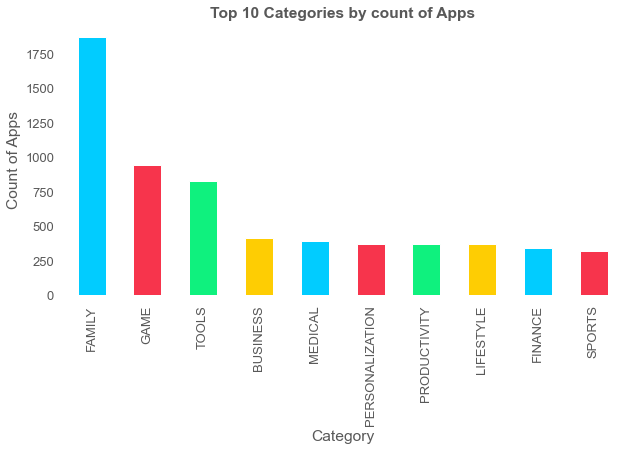

In [24]:
playstore_df.groupby(['Category'])['Category'].count().sort_values(ascending = False).head(10).plot(kind='bar', figsize=(10,5), fontsize=13, color=colors_All)
plt.title('Top 10 Categories by count of Apps',fontweight="bold")
plt.xlabel('Category')
plt.ylabel('Count of Apps')
plt.box(on=None)
plt.savefig('Cat-App-Count.png', dpi=300, bbox_inches='tight') 
plt.show()

# <a id=section505></a>
### 5.5 What is the Rating distribution?

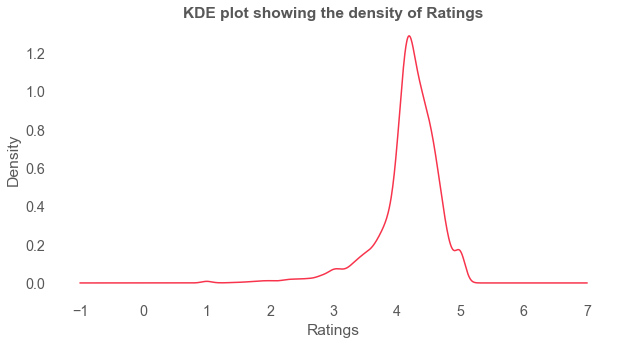

In [25]:
playstore_df['Rating'].plot(kind='kde', figsize=(10,5), color=color_R)

plt.xlabel('Ratings')
plt.ylabel('Density')
plt.title('KDE plot showing the density of Ratings',fontweight="bold")
plt.box(on=None)
plt.savefig('Rat-KDE.png', dpi=300, bbox_inches='tight') 
plt.show()

In [26]:
playstore_df = playstore_df.drop(['App','Genres','Rating','Reviews','Last Updated','Current Ver','Android Ver'], axis = 1)
playstore_df.head()

,Category,Size,Installs,Type,Price,Content Rating
7479,FAMILY,0.209,0.10,Free,0.0,Everyone
7430,GAME,0.116,0.05,Free,0.0,Everyone
10282,TOOLS,0.073,0.10,Free,0.0,Everyone
8418,GAME,4.100,5.00,Free,0.0,Everyone
8084,GAME,1.100,0.05,Free,0.0,Everyone


In [27]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 7479 to 10760
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9659 non-null   object 
 1   Size            9659 non-null   float64
 2   Installs        9659 non-null   float64
 3   Type            9659 non-null   object 
 4   Price           9659 non-null   float64
 5   Content Rating  9659 non-null   object 
dtypes: float64(3), object(3)
memory usage: 848.2+ KB


# <a id=section506></a>
### 5.6 Correlation of attributes based on categories

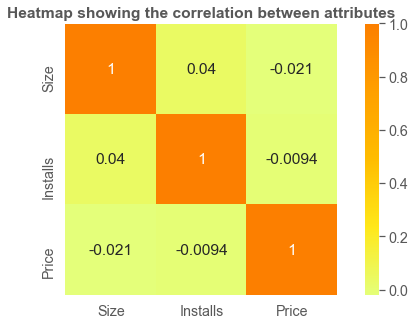

In [28]:
features_correlation = playstore_df.corr()
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(features_correlation,vmax=1,ax=ax,square=True,annot=True,cmap="Wistia")
plt.title('Heatmap showing the correlation between attributes',fontweight="bold")
plt.savefig('Corr-HeatMap.png', dpi=300, bbox_inches='tight') 
plt.show()

# <a id=section507></a>
### 5.7 Observations

Genres distribution is highly imbalanced and does not provide much information <br>
Ratings have no major impact. Most ratings lie in highest band.<br>


Attributes which are ignored for prediction are:
- App Name
- Genres
- Ratings 
- Reviews
- App Versions
- Last updated date

Attributes that wll be considered for prediction are:
- Category
- Content Rating
- Size
- Installs

We will use **Classification** algorithms to determine **Type** of the App i.e. **"Free"** or **"Paid"**
And we will use **Regression** algorithms to determine the approx. **Price** for the App.

# <a id=section6></a>
## 6. Classification

# <a id=section601></a>
### 6.1. Data Preparation for ML

In [29]:
playstore_cat=playstore_df[['Category', 'Content Rating','Type']]

In [30]:
playstore_cont = playstore_df[['Size', 'Installs','Price']]

In [31]:
from sklearn.preprocessing import LabelEncoder
def Label(playstore_cat):
    return playstore_cat.apply(LabelEncoder().fit_transform)
playstore_cat = Label(playstore_cat)

### Combining the numerical and categorical dataset.

In [32]:
ps_final= pd.concat([playstore_cont, playstore_cat], axis = 1)

In [33]:
ps_final1 = ps_final.drop(['Price'],axis = 1)

### Extract the independent columns to prepare X 

In [34]:
X = pd.DataFrame()
def me():
    X = ps_final1.loc[:,ps_final1.columns != 'Type']
    return X
X = me()
X.head()

,Size,Installs,Category,Content Rating
7479,0.209,0.10,11,1
7430,0.116,0.05,14,1
10282,0.073,0.10,29,1
8418,4.100,5.00,14,1
8084,1.100,0.05,14,1


### Extract dependent column into a dataframe 'y' for model prediction

In [35]:
y = pd.DataFrame()
def me():
    y = ps_final1.loc[:,ps_final1.columns == 'Type']
    return y
y = me()
y.head()

,Type
7479,0
7430,0
10282,0
8418,0
8084,0


### Splitting X and y into train and test dataset

In [36]:
from sklearn.model_selection import train_test_split
def me():
    return train_test_split(X, y, test_size=0.25, random_state=1) 
X_train, X_test, y_train, y_test = me()

### Check the shape of X an y of train dataset.

In [37]:
def me():
    print(X_train.shape)
    print(y_train.shape)
me()

(7244, 4)
(7244, 1)


### Check the shape of X and y of test dataset.

In [38]:
def me():
    print(X_test.shape)
    print(y_test.shape)
me()

(2415, 4)
(2415, 1)


# <a id=section602></a>
### 6.2. Model 1: Decision Tree Classifier

In [39]:
from sklearn import tree
model_Class_DT_1 = tree.DecisionTreeClassifier(random_state = 0)
model_Class_DT_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
y_pred_train1 = model_Class_DT_1.predict(X_train)  
y_pred_test1 = model_Class_DT_1.predict(X_test) 

# <a id=section603></a>
### 6.3. Model 2: Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_Class_RF_2 = RandomForestClassifier(random_state = 0)
model_Class_RF_2.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [42]:
y_pred_train2 = model_Class_RF_2.predict(X_train)  
y_pred_test2 = model_Class_RF_2.predict(X_test)

# <a id=section604></a>
### 6.4. Model 3: Grid Search CV_DT

In [43]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
model_Class_GS_3 = GridSearchCV(tree.DecisionTreeClassifier(),tree_para, cv=5)
model_Class_GS_3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [44]:
y_pred_train3 = model_Class_GS_3.predict(X_train)  
y_pred_test3 = model_Class_GS_3.predict(X_test)

# <a id=section605></a>
### 6.5. Model 4: Grid Search CV_RF

In [45]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
model_Class_GS_4 = GridSearchCV(RandomForestClassifier(),tree_para, cv=5)
model_Class_GS_4.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [46]:
y_pred_train4 = model_Class_GS_4.predict(X_train)  
y_pred_test4 = model_Class_GS_4.predict(X_test)

# <a id=section606></a>
### 6.6. Model 5: Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
model_Class_LR_5 = LogisticRegression(random_state = 0)
model_Class_LR_5.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred_train5 = model_Class_LR_5.predict(X_train)  
y_pred_test5 = model_Class_LR_5.predict(X_test)

# <a id=section607></a>
### 6.7. Model 6: Grid Search CV_LogR

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
model_Class_GS_6 = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
model_Class_GS_6.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [50]:
y_pred_train6 = model_Class_GS_6.predict(X_train)  
y_pred_test6 = model_Class_GS_6.predict(X_test)

# <a id=section608></a>
### 6.8. Model Comparisions

In [51]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data with model 1 is:',accuracy_score(y_test, y_pred_test1))
print('Accuracy score for test data with model 2 is:',accuracy_score(y_test, y_pred_test2))
print('Accuracy score for test data with model 3 is:',accuracy_score(y_test, y_pred_test3))
print('Accuracy score for test data with model 4 is:',accuracy_score(y_test, y_pred_test4))
print('Accuracy score for test data with model 5 is:',accuracy_score(y_test, y_pred_test5))
print('Accuracy score for test data with model 6 is:',accuracy_score(y_test, y_pred_test6))

Accuracy score for test data with model 1 is: 0.881159420289855
Accuracy score for test data with model 2 is: 0.9006211180124224
Accuracy score for test data with model 3 is: 0.9192546583850931
Accuracy score for test data with model 4 is: 0.924223602484472
Accuracy score for test data with model 5 is: 0.9217391304347826
Accuracy score for test data with model 6 is: 0.9217391304347826


In [52]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_test,y_pred_test1)
print('Precision score for test data using model1 is:', precision1)
precision2 = precision_score(y_test,y_pred_test2)
print('Precision score for test data using model2 is:', precision2)
precision3 = precision_score(y_test,y_pred_test3)
print('Precision score for test data using model3 is:', precision3)
precision4 = precision_score(y_test,y_pred_test4)
print('Precision score for test data using model4 is:', precision4)
precision5 = precision_score(y_test,y_pred_test5)
print('Precision score for test data using model5 is:', precision5)
precision6 = precision_score(y_test,y_pred_test6)
print('Precision score for test data using model6 is:', precision6)

Precision score for test data using model1 is: 0.22777777777777777
Precision score for test data using model2 is: 0.26605504587155965
Precision score for test data using model3 is: 0.2
Precision score for test data using model4 is: 0.59375
Precision score for test data using model5 is: 0.0
Precision score for test data using model6 is: 0.0


In [53]:
from sklearn.metrics import recall_score
print('Recall score for test data using model1 is:',recall_score(y_test,y_pred_test1))   
print('Recall score for test data using model2 is:',recall_score(y_test,y_pred_test2))
print('Recall score for test data using model3 is:',recall_score(y_test,y_pred_test3))
print('Recall score for test data using model4 is:',recall_score(y_test,y_pred_test4))
print('Recall score for test data using model5 is:',recall_score(y_test,y_pred_test5))
print('Recall score for test data using model6 is:',recall_score(y_test,y_pred_test6))

Recall score for test data using model1 is: 0.21693121693121692
Recall score for test data using model2 is: 0.15343915343915343
Recall score for test data using model3 is: 0.010582010582010581
Recall score for test data using model4 is: 0.10052910052910052
Recall score for test data using model5 is: 0.0
Recall score for test data using model6 is: 0.0


In [54]:
from sklearn.metrics import confusion_matrix
print('Confusion matrix for test data with model 1 is:\n',confusion_matrix(y_test, y_pred_test1))
print('Confusion matrix for test data with model 2 is:\n',confusion_matrix(y_test, y_pred_test2))
print('Confusion matrix for test data with model 3 is:\n',confusion_matrix(y_test, y_pred_test3))
print('Confusion matrix for test data with model 4 is:\n',confusion_matrix(y_test, y_pred_test4))
print('Confusion matrix for test data with model 5 is:\n',confusion_matrix(y_test, y_pred_test5))
print('Confusion matrix for test data with model 6 is:\n',confusion_matrix(y_test, y_pred_test6))

Confusion matrix for test data with model 1 is:
 [[2087  139]
 [ 148   41]]
Confusion matrix for test data with model 2 is:
 [[2146   80]
 [ 160   29]]
Confusion matrix for test data with model 3 is:
 [[2218    8]
 [ 187    2]]
Confusion matrix for test data with model 4 is:
 [[2213   13]
 [ 170   19]]
Confusion matrix for test data with model 5 is:
 [[2226    0]
 [ 189    0]]
Confusion matrix for test data with model 6 is:
 [[2226    0]
 [ 189    0]]


In [55]:
from sklearn.metrics import f1_score
print('F1 score for test data with model 1 is:',f1_score(y_test, y_pred_test1))
print('F1 score for test data with model 2 is:',f1_score(y_test, y_pred_test2))
print('F1 score for test data with model 3 is:',f1_score(y_test, y_pred_test3))
print('F1 score for test data with model 4 is:',f1_score(y_test, y_pred_test4))
print('F1 score for test data with model 5 is:',f1_score(y_test, y_pred_test5))
print('F1 score for test data with model 6 is:',f1_score(y_test, y_pred_test6))

F1 score for test data with model 1 is: 0.22222222222222218
F1 score for test data with model 2 is: 0.1946308724832215
F1 score for test data with model 3 is: 0.020100502512562814
F1 score for test data with model 4 is: 0.17194570135746606
F1 score for test data with model 5 is: 0.0
F1 score for test data with model 6 is: 0.0


# <a id=section609></a>
### 6.9. Summary

To sum up, we have developed a total of 6 models under Logistic Regression, Decision Tree, Random Forest and corresponding Grid Search CV. We trained these models with our train dataset and tested each models with our test dataset. Each model gave us average results with an accuracy of ~90%.

The Accuracy, Precision and Recall for each models for test datasets are as under:

|Sl. No.|| Model Name || Accuracy (Test) || Precision (Test) || Recall (Test)|| F1 Score (Test)|
|----||---------||------------||-------------||----------||----------|
|1|| Decision Tree Model-1|| .88|| .23|| .22|| .22|
|2|| Random Forest Model-2|| .90|| .27|| .15|| .19|
|3|| GridSearchCV_DT Model - 3|| .92|| .2|| .01|| .02|
|4|| GridSearchCV_RF Model - 4|| .92|| .53|| .11|| .18
|5|| Logistic Regression Model-5|| .92|| .0|| .0|| .0|
|6|| GridSearchCV_LogR Model - 6|| .92|| .0|| .0|| .0|

Therefore based on all scores and highest precision, **GridSearchCV_RF Model - 4** is the best model for this dataset.<br>
Though there is a need of more attributes to built a better model.

# <a id=section7></a>
## 7. Regression

# <a id=section701></a>
### 7.1. Data Preparation for ML

Removing data point/records of free apps from the dataset

In [56]:
ps_final2 = ps_final[ps_final.Type != 0]
ps_final2

,Size,Installs,Price,Category,Content Rating,Type
5144,0.081,0.00010,4.99,29,1,1
7237,0.029,0.00100,1.49,29,1,1
10460,0.026,0.00500,1.00,29,1,1
9920,2.100,0.00010,1.26,11,1,1
10798,1.020,0.00005,1.04,11,1,1
...,...,...,...,...,...,...
4577,37.000,0.00100,1.99,23,1,1
4834,68.000,0.00100,1.49,23,1,1
6766,3.800,0.00100,0.99,29,1,1
7328,6.100,0.00500,3.99,30,1,1


In [57]:
ps_final2 = ps_final2.drop(['Type'],axis = 1)

In [58]:
X1 = pd.DataFrame()
def me():
    X1 = ps_final2.loc[:,ps_final2.columns != 'Price']
    return X1
X1 = me()

In [59]:
y1 = pd.DataFrame()
def me():
    y1 = ps_final2.loc[:,ps_final2.columns == 'Price']
    return y1
y1 = me()

In [60]:
from sklearn.model_selection import train_test_split
def me():
    return train_test_split(X1, y1, test_size=0.25, random_state=1) 
X1_train, X1_test, y1_train, y1_test = me()

In [61]:
def me():
    print(X1_train.shape)
    print(y1_train.shape)
me()

(565, 4)
(565, 1)


In [62]:
def me():
    print(X1_test.shape)
    print(y1_test.shape)
me()

(189, 4)
(189, 1)


# <a id=section702></a>
### 7.2. Model 1: Decision Tree Regressor

In [63]:
# Importing and developing simple Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
Model_Reg_DT_1 = DecisionTreeRegressor(criterion='mse')
Model_Reg_DT_1.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [64]:
y1_train_pred1=Model_Reg_DT_1.predict(X1_train)
y1_test_pred1=Model_Reg_DT_1.predict(X1_test)

# <a id=section703></a>
### 7.3. Model 2: Grid Search CV_DT

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

decision_tree_regressor= DecisionTreeRegressor(random_state = 0)

max_depth = list(range(2, 60))
max_depth.append('None')

tree_para = [{'max_depth': max_depth,
              'splitter' : ["best", "random"],
              'max_features': ["auto", "log2"] }]
                            
                            

grid_search = GridSearchCV(decision_tree_regressor,tree_para, cv=10, refit='AUC')
grid_search.fit(X1_train, y1_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                        14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                        24, 25, 26, 27, 28, 29, 30, 31, ...],
                          'max_features': ['auto', 'log2'],
                          'splitter': ['best', 'random']}],
             refit='AUC')

In [66]:
Model_Reg_GS_2 = grid_search.best_estimator_
y1_train_pred2=Model_Reg_GS_2.predict(X1_train)
y1_test_pred2=Model_Reg_GS_2.predict(X1_test)

# <a id=section704></a>
### 7.4. Model 3: Random Forest Regressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
Model_Reg_RF_3 = RandomForestRegressor(random_state = 0)
Model_Reg_RF_3.fit(X1_train, y1_train)

RandomForestRegressor(random_state=0)

In [68]:
y1_train_pred3 = Model_Reg_RF_3.predict(X1_train)
y1_test_pred3 = Model_Reg_RF_3.predict(X1_test)

# <a id=section705></a>
### 7.5. Model 4: Grid Search CV_RF1

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV

max_depth = list(range(2, 60))
max_depth.append('None')

# specify parameters and distributions to sample from
param_dist = {"max_depth": max_depth,
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "n_estimators": [100, 400, 700, 1000, 1500],
              'max_features': ["auto", "log2"]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(Model_Reg_RF_3, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)
random_search.fit(X1_train, y1_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, 31, ...],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000218A28E09A0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000218A31D4CA0>,
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]})

In [70]:
Model_Reg_GS_4 = random_search.best_estimator_
y1_train_pred4 = Model_Reg_GS_4.predict(X1_train)
y1_test_pred4 = Model_Reg_GS_4.predict(X1_test)

# <a id=section706></a>
### 7.6. Model 5: Grid Search CV_RF2

In [71]:
max_depth = list(range(2, 60))
max_depth.append('None')

tree_para = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
                            
                            

grid_search1 = GridSearchCV(Model_Reg_RF_3,tree_para, cv=10, refit='AUC')
grid_search1.fit(X1_train, y1_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             refit='AUC')

In [72]:
Model_Reg_GS_5 = grid_search1.best_estimator_
y1_train_pred5=Model_Reg_GS_5.predict(X1_train)
y1_test_pred5=Model_Reg_GS_5.predict(X1_test)

# <a id=section707></a>
### 7.7. Model 6: Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
Model_Reg_LR_6 = lr()
def lr():
    Model_Reg_LR_6.fit(X1_train, y1_train)  
lr()

In [74]:
y1_train_pred6 = Model_Reg_LR_6.predict(X1_train)
y1_test_pred6 = Model_Reg_LR_6.predict(X1_test)

# <a id=section708></a>
### 7.8. Model Evaluation

In [75]:
#finding RMSE values
from sklearn import metrics
RMSE_test_dt1=np.sqrt(metrics.mean_squared_error(y1_test,y1_test_pred1))
print('The RMSE Value of Test Dataset for Model 1 is  :',RMSE_test_dt1)
RMSE_test_dt2=np.sqrt(metrics.mean_squared_error(y1_test,y1_test_pred2))
print('The RMSE Value of Test Dataset for Model 2 is  :',RMSE_test_dt2)
RMSE_test_dt3=np.sqrt(metrics.mean_squared_error(y1_test,y1_test_pred3))
print('The RMSE Value of Test Dataset for Model 3 is  :',RMSE_test_dt3)
RMSE_test_dt4=np.sqrt(metrics.mean_squared_error(y1_test,y1_test_pred4))
print('The RMSE Value of Test Dataset for Model 4 is  :',RMSE_test_dt4)
RMSE_test_dt5=np.sqrt(metrics.mean_squared_error(y1_test,y1_test_pred5))
print('The RMSE Value of Test Dataset for Model 5 is  :',RMSE_test_dt5)
RMSE_test_dt6=np.sqrt(metrics.mean_squared_error(y1_test,y1_test_pred6))
print('The RMSE Value of Test Dataset for Model 6 is  :',RMSE_test_dt6)

The RMSE Value of Test Dataset for Model 1 is  : 57.264409551856474
The RMSE Value of Test Dataset for Model 2 is  : 44.39507456951437
The RMSE Value of Test Dataset for Model 3 is  : 38.1052320007382
The RMSE Value of Test Dataset for Model 4 is  : 39.69319435873893
The RMSE Value of Test Dataset for Model 5 is  : 40.415375079414986
The RMSE Value of Test Dataset for Model 6 is  : 45.79927077556059


In [76]:
from sklearn.metrics import r2_score
r2_dt_test1=r2_score(y1_test, y1_test_pred1)
print('The R-square value for Test Data of Model 1 is :', r2_dt_test1)
r2_dt_test2=r2_score(y1_test, y1_test_pred2)
print('The R-square value for Test Data of Model 2 is :', r2_dt_test2)
r2_dt_test3=r2_score(y1_test, y1_test_pred3)
print('The R-square value for Test Data of Model 3 is :', r2_dt_test3)
r2_dt_test4=r2_score(y1_test, y1_test_pred4)
print('The R-square value for Test Data of Model 4 is :', r2_dt_test4)
r2_dt_test5=r2_score(y1_test, y1_test_pred5)
print('The R-square value for Test Data of Model 5 is :', r2_dt_test5)
r2_dt_test6=r2_score(y1_test, y1_test_pred6)
print('The R-square value for Test Data of Model 6 is :', r2_dt_test6)

The R-square value for Test Data of Model 1 is : -0.5516569041325408
The R-square value for Test Data of Model 2 is : 0.06739937203392021
The R-square value for Test Data of Model 3 is : 0.31293892553566294
The R-square value for Test Data of Model 4 is : 0.2544818425898957
The R-square value for Test Data of Model 5 is : 0.22710704034373186
The R-square value for Test Data of Model 6 is : 0.007470896539379157


In [77]:
def Adjusted_r2(r_square,N): #creating function so that we can call the function again and again
    return(1-(((1-r_square)*(N-1))/(N-6)))

In [78]:
adj_r2_test1=Adjusted_r2(r2_dt_test1,len(X1_test))
print('The Adjusted R-square value for Test Data of Model 1 is :', adj_r2_test1)
adj_r2_test2=Adjusted_r2(r2_dt_test2,len(X1_test))
print('The Adjusted R-square value for Test Data of Model 2 is :', adj_r2_test2)
adj_r2_test3=Adjusted_r2(r2_dt_test3,len(X1_test))
print('The Adjusted R-square value for Test Data of Model 3 is :', adj_r2_test3)
adj_r2_test4=Adjusted_r2(r2_dt_test4,len(X1_test))
print('The Adjusted R-square value for Test Data of Model 4 is :', adj_r2_test4)
adj_r2_test5=Adjusted_r2(r2_dt_test5,len(X1_test))
print('The Adjusted R-square value for Test Data of Model 5 is :', adj_r2_test5)
adj_r2_test6=Adjusted_r2(r2_dt_test6,len(X1_test))
print('The Adjusted R-square value for Test Data of Model 6 is :', adj_r2_test6)

The Adjusted R-square value for Test Data of Model 1 is : -0.5940519015132113
The Adjusted R-square value for Test Data of Model 2 is : 0.04191848055943703
The Adjusted R-square value for Test Data of Model 3 is : 0.2941667650311728
The Adjusted R-square value for Test Data of Model 4 is : 0.23411249402677803
The Adjusted R-square value for Test Data of Model 5 is : 0.20598974636405243
The Adjusted R-square value for Test Data of Model 6 is : -0.01964738497593821


# <a id=section709></a>
### 7.9. Summary

To sum up, we have developed a total of 6 models under Linear Regression, Decision Tree, Random Forest and corresponding Grid Search CV. We trained these models with our train dataset and tested each models with our test dataset. Each model gave us average results with Random forest models performing slightly better.

The RMSE, R2 and Adjusted R2 for each models for test datasets are as under:

|Sl. No.|| Model Name || RMSE (Test) || R2 (Test) || Adj R2 (Test)|
|----||---------||------------||-------------||----------|
|1|| Decision Tree Model-1||43.7 ||0.10||0.07|
|2|| GridSearchCV_DT Model - 2||44.6||0.06||0.03|
|3|| Random Forest Model-3||38.1||0.31||0.30|
|4|| GridSearchCV_RF1 Model - 4||39.7||0.25||0.23|
|5|| GridSearchCV_RF2 Model - 5||40.4||0.23||0.21|
|6|| Linear Regression Model-6||45.8||0.01||-0.02|

Therefore based on RMSE and R2 values, **Random Forest Model - 3** is the best model for this dataset.<br>
Though this model can give an approximation for price point; but there is a definite need of more attributesand records to built a better model.



<a id=section8></a>
## 8. Conclusion

- The analysis reveals insights on pricing of Apps

- It gives decent price point predictions based on minimal information on **Categories**, **Size**, **Content type** and **Installs**

- Though we were able to derive and identify some decent models for predicting the price of Apps, but for better models some additional information is a must